# Rerng Fig

For figure 3

In [6]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from numpy import array as arr
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from importlib import reload
#from fitters import gaussian
import MarksConstants as mc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from fitters import double_gaussian

In [7]:
day = '1'
month = 'January'
year = '1900'
from CalibrationModules import D1_DacToFreq, TweezerPowerToDepth, MOT_DacToFreq
import pandas as pd
import mpl_toolkits.axes_grid1 as axesTool
import matplotlib as mpl
import math
import scipy.optimize as opt
from ExpFile import setPath
import ExpFile as exp
#from VersionManagement import getVersions
import PlotlyPlotters as pp
import MatplotlibPlotters as mp
import MainAnalysis as ma
import AnalysisHelpers as ah
import Miscellaneous as misc
import MarksConstants as mc
from importlib import reload
def reloadMyModules():
    reload(exp)
    setPath(day,month,year)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
reloadMyModules()
paper_Font_Size=12
grey_mol_file = 'Grey_Molasses_Loading.h5'
alt_grey_mol_file = 'Alt_Grey_Molasses_Loading.h5'
red_optimum_file = 'Single_Atom_Red_Optimized.h5'
red_pgc_file = 'Red_Pgc_Loading.h5'
grey_mol_file_10x10 = '10x10_Grey_Molasses_Loading.h5'
single_optimum_file = 'Single_Atom_Optimized.h5'
rerng_exp_file = 'Rerng_6x6_Paper.h5'
rerng_moves_record = 'Rearranging_Move_Record_Paper.txt'

In [8]:
import matplotlib as mpl
mpl.rc('font', family='cmr10') 
mpl.rcParams['axes.unicode_minus']= False
mpl.rcParams['mathtext.fontset'] = 'cm'
#mpl.rc('font', serif='Helvetica Neue') 
mpl.rc('font', size=9) 
mpl.rcParams['figure.dpi']= 200

## Loading & Init Analysis

Use standard analysis to get the core structures from the images

In [6]:
print(0.7**36*100, 0.76**25*100)

0.00026517308458596476 0.10479481782464546


In [5]:
reloadMyModules()

### rearrangement test (annotated afterwards)

Number of Pictures: 10000; Picture Dimensions: 25 x 23
Variations: 1;	Repetitions: 5000
Experiment started at (H:M:S)  on (Y-M-D) , And ended at  on 
Experiment Rationale: _
Experiment Result: _



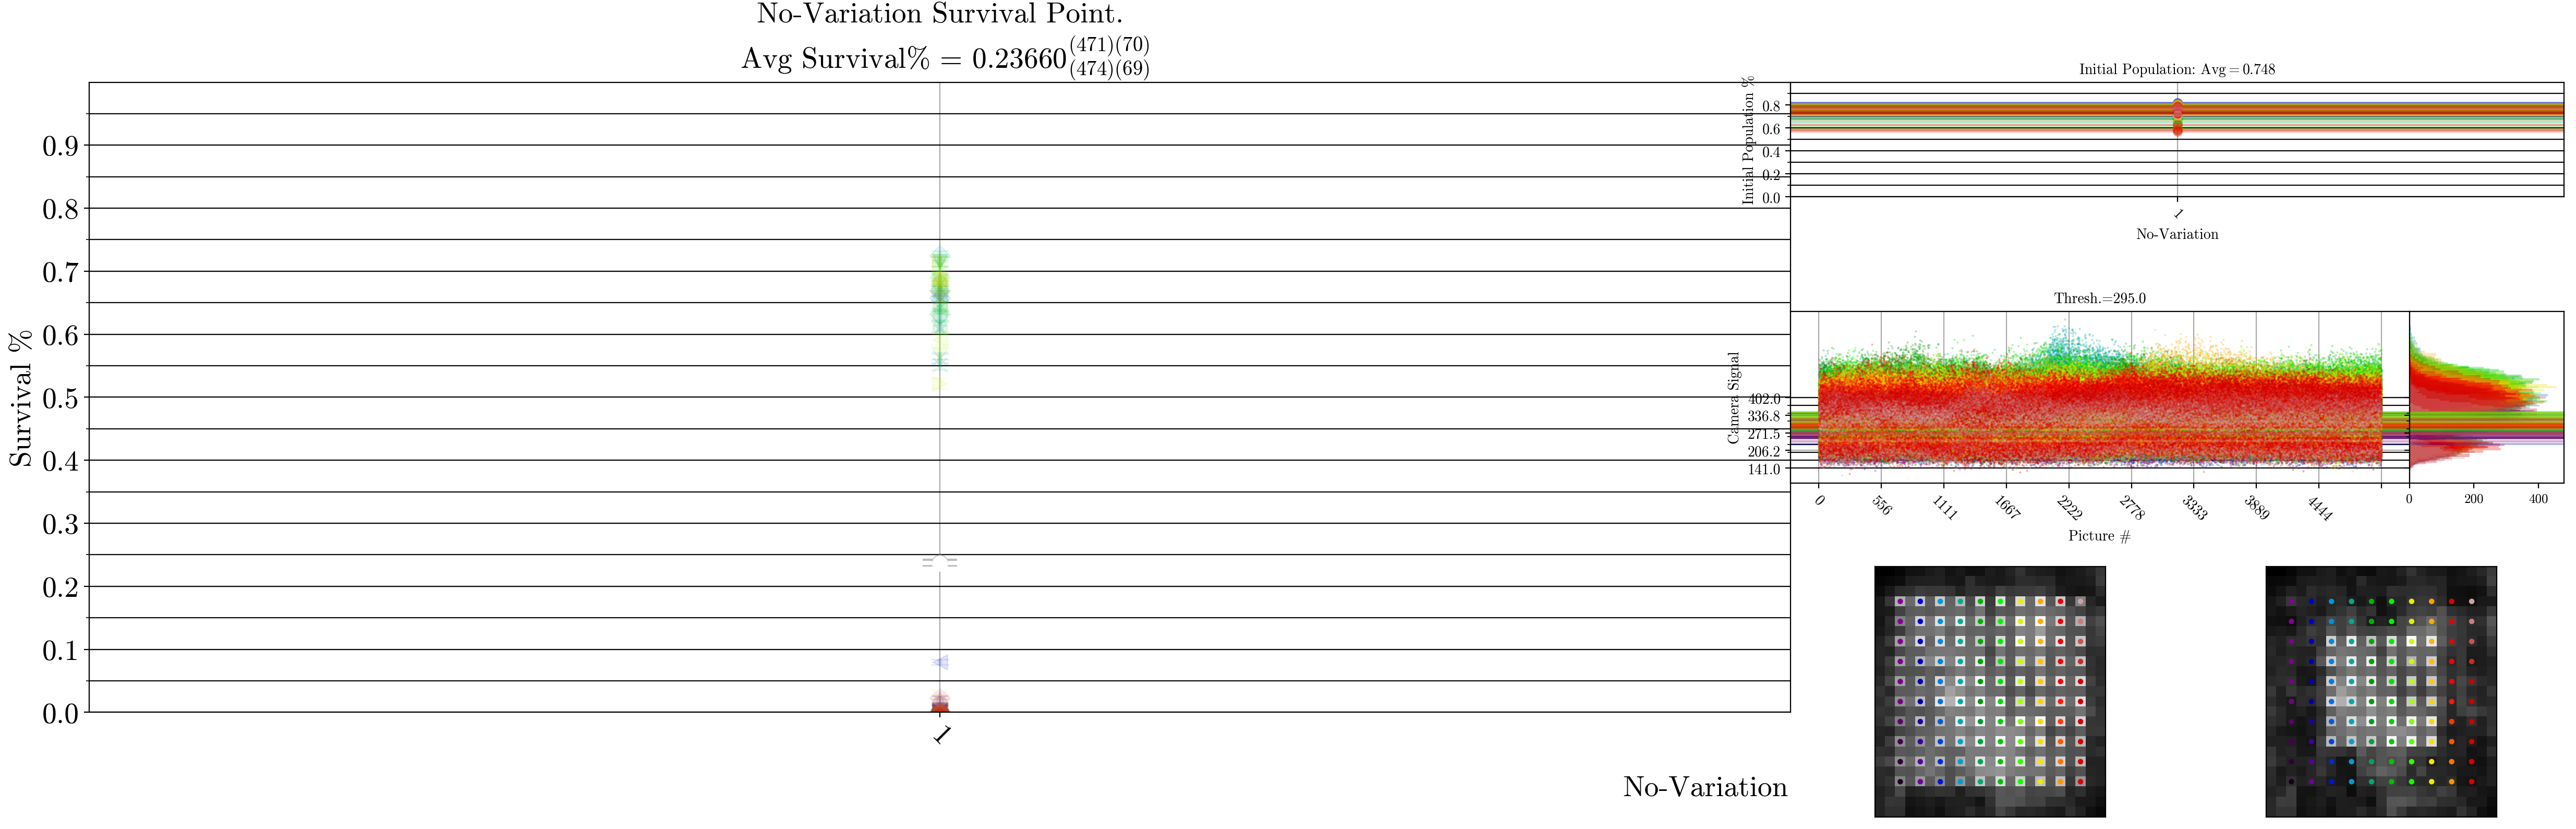

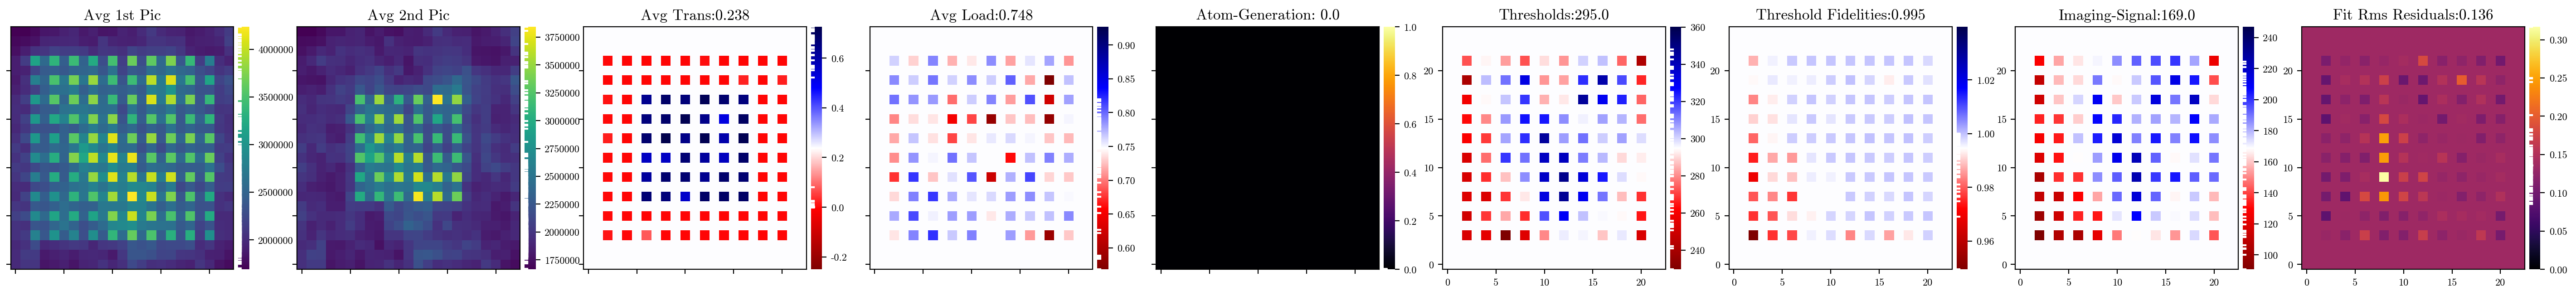

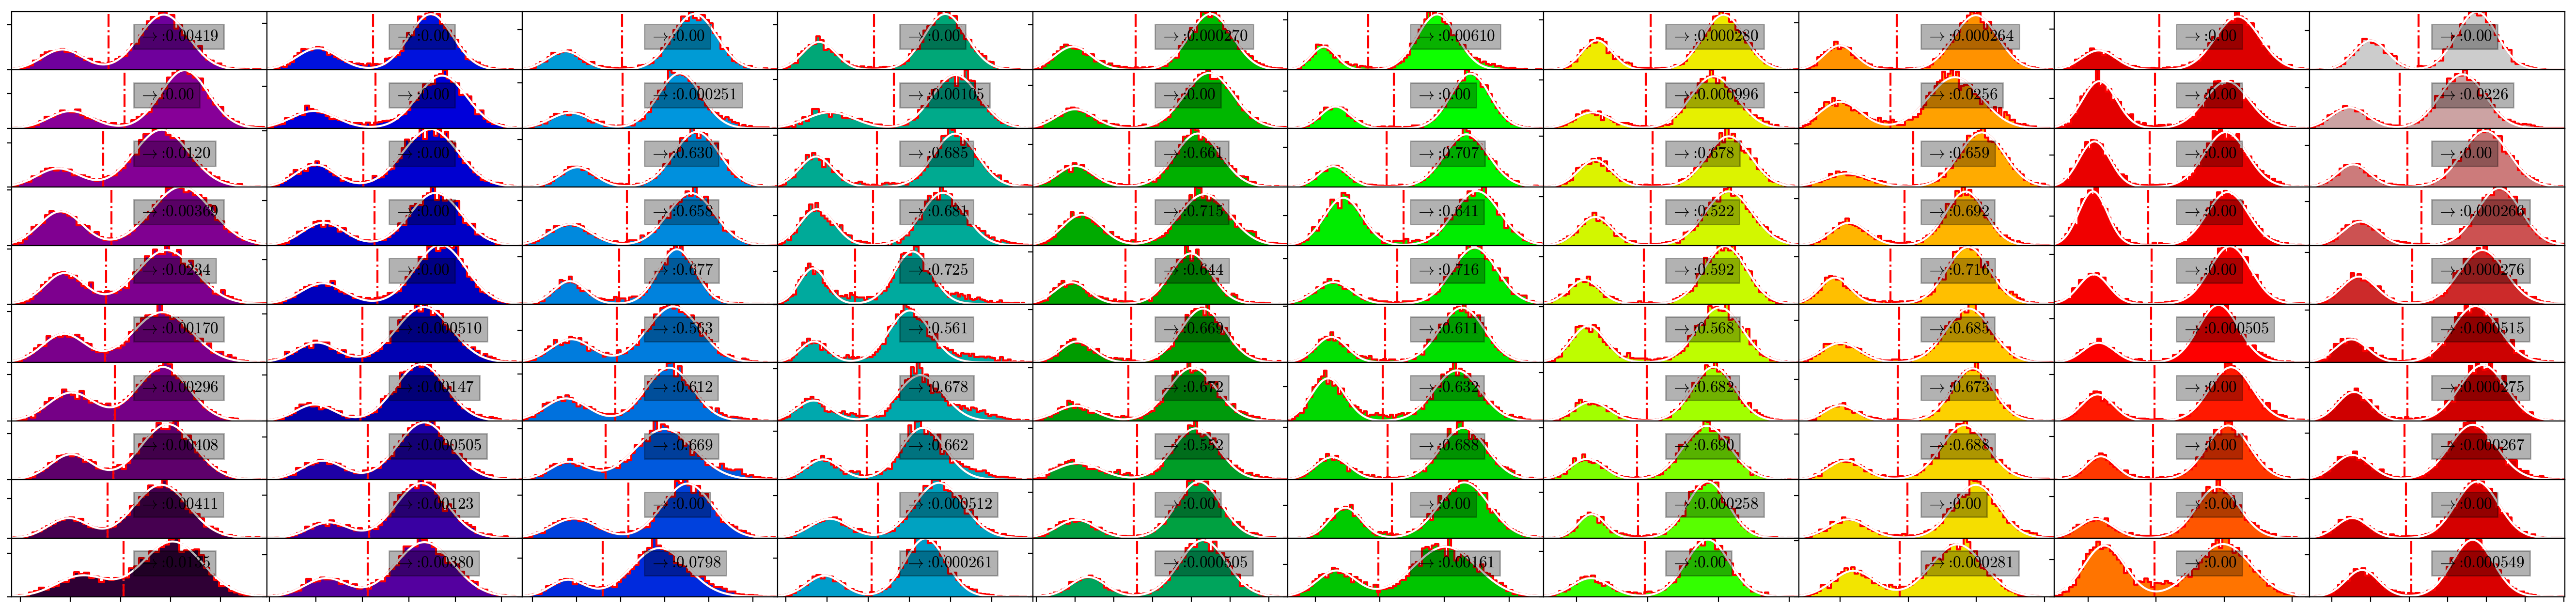

In [9]:
res = mp.Survival(rerng_exp_file, [3,2,2,10,10], subtractEdgeCounts=False, transThresholdSame=True, plotIndvHists=True);
( key, transferData, transferErrs, loadingRate, fits, avgFit, genAvgs, genErrs, pic1Data, 
  centers, avgTransferPic, transVarAvg, transVarErr, avgTransferData, avgTransferErr,
  loadAtomImages, transAtomImages, pic2Data, loadThresholds, transThresholds, _) = res

Open and use the rearrangement log file to analyze what moves were made, success rates, when things were successful, etc. Most important out of this block is that it pulls pictures of successful moves. Some of this is probably not important for the figure notebook but was used for the original data analysis

In [9]:
res.keys()

dict_keys(['Key', 'All_Transfer', 'All_Transfer_Errs', 'Initial_Populations', 'Transfer_Fits', 'Average_Transfer_Fit', 'Average_Atom_Generation', 'Average_Atom_Generation_Err', 'Picture_1_Data', 'Fit_Centers', 'Average_Transfer_Pic', 'Transfer_Averaged_Over_Variations', 'Transfer_Averaged_Over_Variations_Err', 'Average_Transfer', 'Average_Transfer_Err', 'Initial_Atom_Images', 'Transfer_Atom_Images', 'Picture_2_Data', 'Initial_Thresholds', 'Transfer_Thresholds', 'Fit_Modules'])

In [10]:
transAtomImages=res['Transfer_Atom_Images']
loadAtomImages=res['Initial_Atom_Images']
loadThresholds=res['Initial_Thresholds']

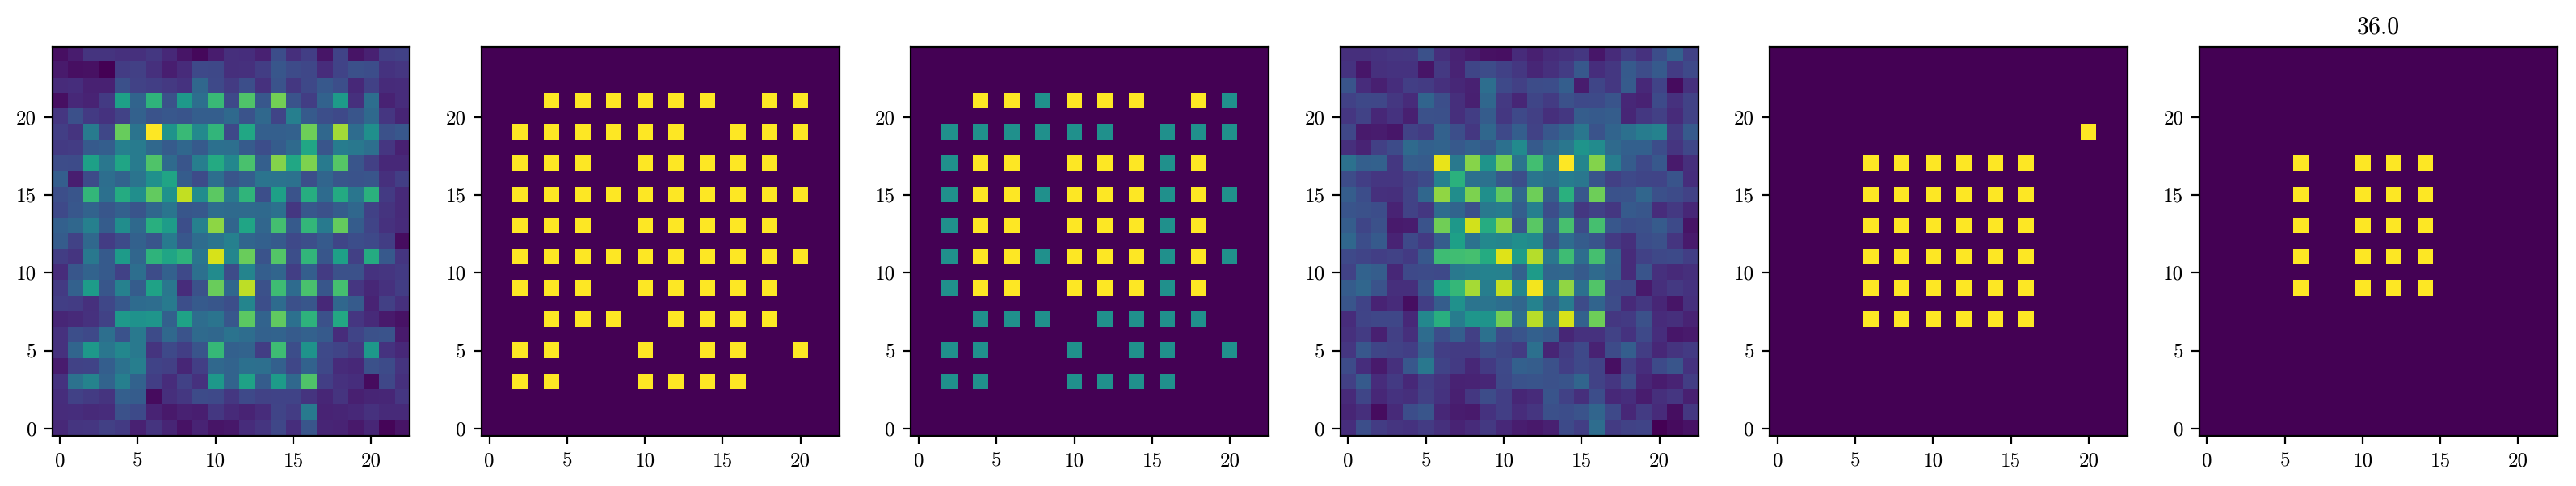

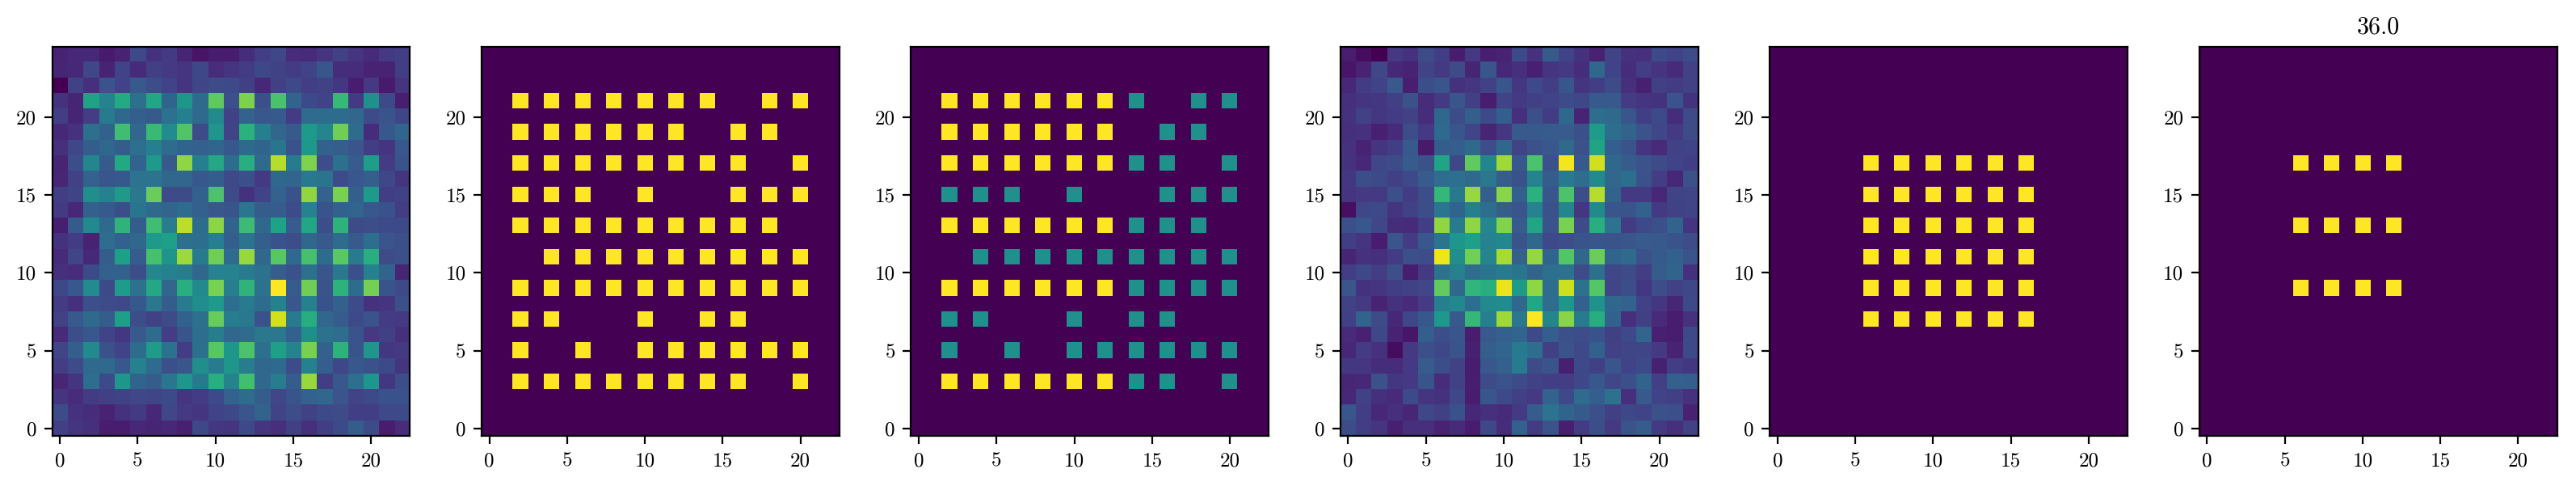

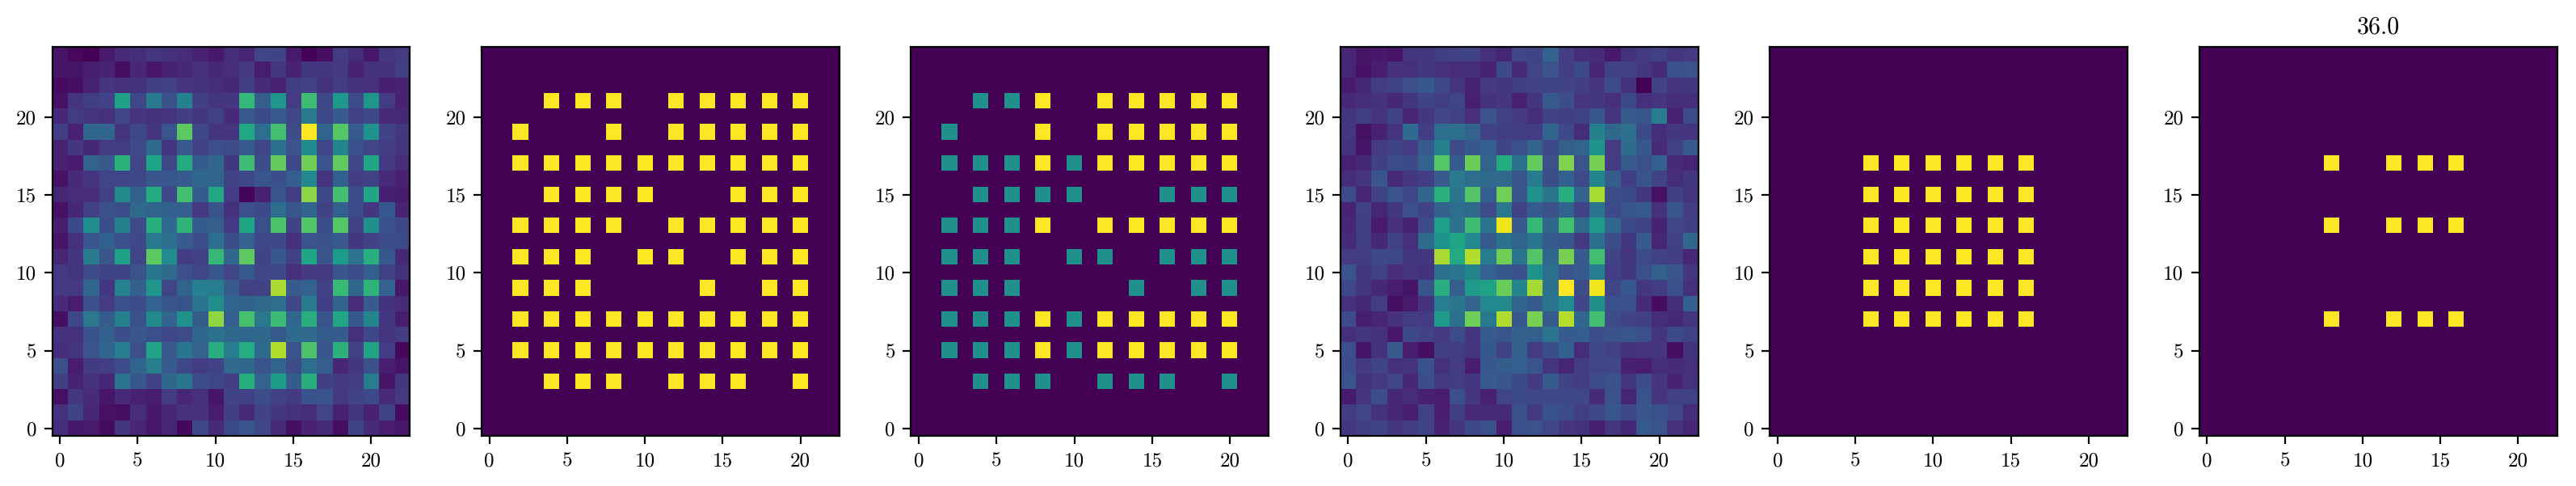

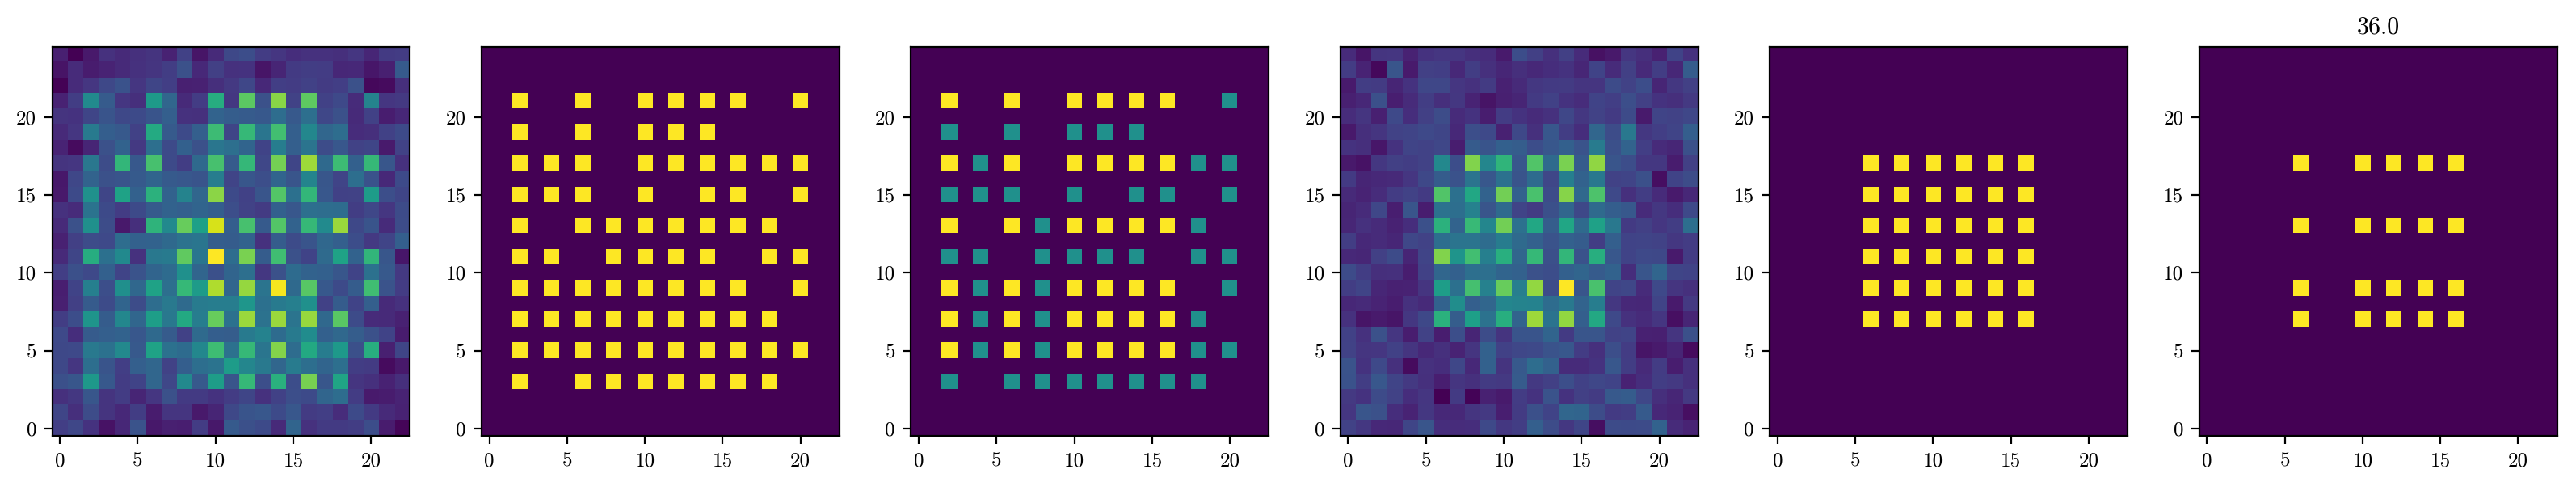

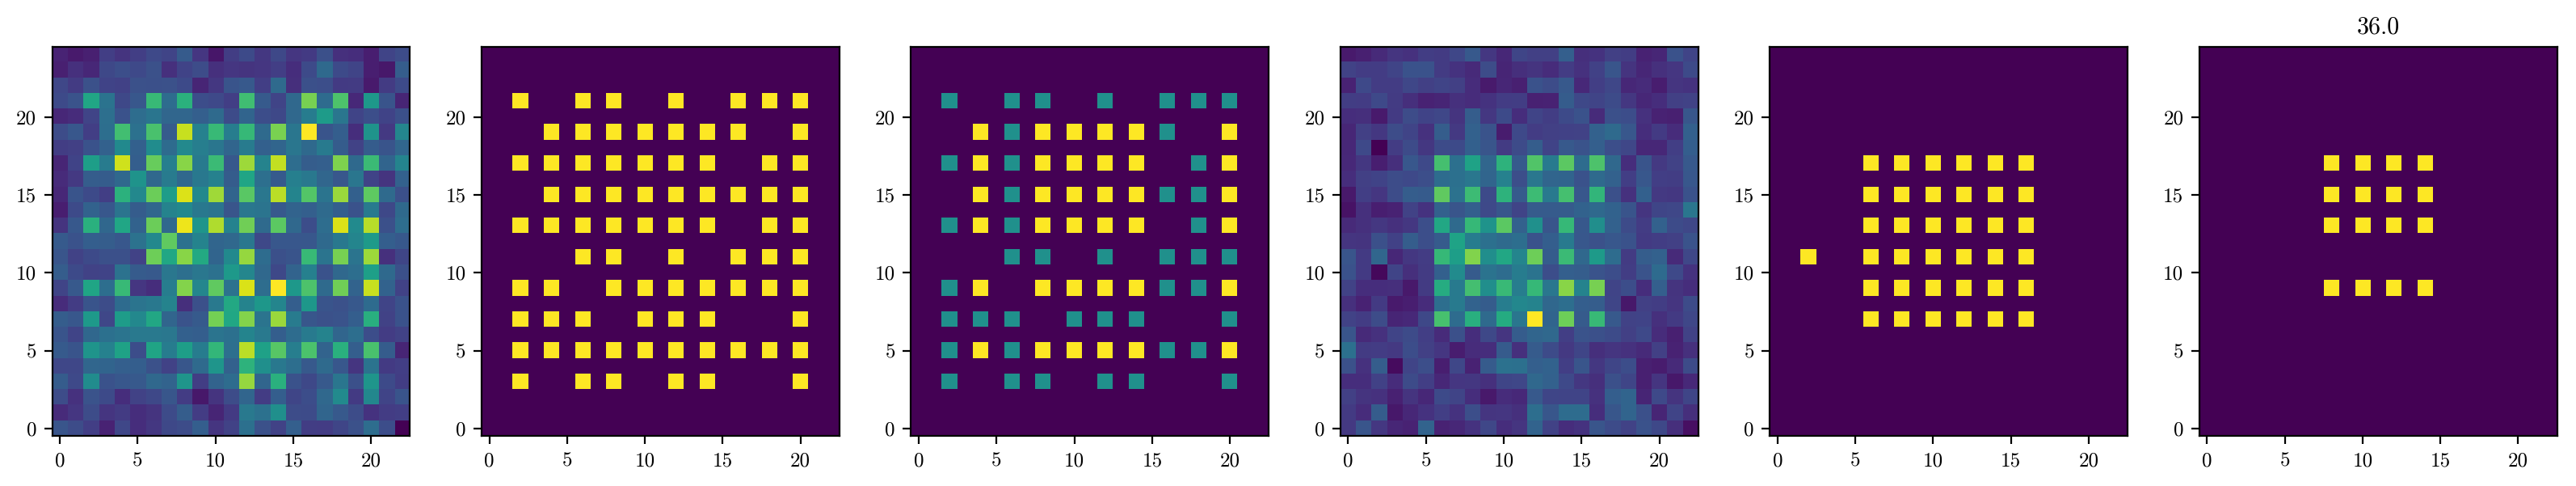

In [11]:
with exp.ExpFile(rerng_exp_file) as f:
    pics = f.get_pics()
count25 = 0
survivalList=[]
nomatch = 0
rerngSize = 6
finArray = np.zeros((25,23))
finlocs = ah.unpackAtomLocations([7,6,2,6,6])
for l in finlocs:
    finArray[l[0],l[1]] = 1
initPics36, finPics36, atomizedPics36, finAtomized36, initAtomized = [[], [], [], [], []]
    
with open(rerng_moves_record) as f:
    for i, l in enumerate(f.readlines()[:]):
        if i < rerngSize+2:
            continue
        ln = i-rerngSize-2
        if ln % 4 == 0:
            continue
        if ln%4 == 1:
            expnum = int(int(ln)/4)
            sourceStr = l[7:-5]
            for x in [' ',';','\n']:
                sourceStr = sourceStr.replace(x,'')
            source = np.reshape([int(x) for x in sourceStr.split(',')],(10,10))
            sourcem = np.zeros((25,23)).astype(int)
            for i in range(10):
                for j in range(10):
                    if source[i,j]:
                        sourcem[2*i+3,2*j+2] = 1
        if ln%4 == 2:
            yind = [int(x) for x in l[:-3].split(',')]
        if ln%4 == 3:
            xind = [int(x) for x in l[:-3].split(',')]
            if yind == xind == [9,8,7,6,5,4]:
                nomatch += 1
                continue
            subm = np.zeros((25,23)).astype(int)
            for i in range(10):
                for j in range(10):
                    if i in yind and j in xind:
                        subm[2*i+3,2*j+2] = 1
            finNumAtoms = sum((transAtomImages[expnum] * finArray).flatten())
            survivalList.append(finNumAtoms)
            if (finNumAtoms >= 36):
                count25 += 1
                initPics36.append(pics[2*expnum])
                initAtomized.append(loadAtomImages[expnum])
                atomizedPics36.append(loadAtomImages[expnum] + subm)
                finAtomized36.append(transAtomImages[expnum])
                finPics36.append(pics[2*expnum+1])
                if True:
                    f, ax = plt.subplots(1,6, figsize=(20,20))
                    plt.title(finNumAtoms)
                    ax[0].imshow(pics[2*expnum], origin='bottom')
                    ax[1].imshow(loadAtomImages[expnum], origin='bottom')
                    ax[2].imshow(loadAtomImages[expnum] + subm, origin='bottom')
                    ax[3].imshow(pics[2*expnum+1], origin='bottom')
                    ax[4].imshow(transAtomImages[expnum], origin='bottom')
                    ax[5].imshow(transAtomImages[expnum] * subm, origin='bottom')
                    for a in ax:
                        a.grid(False)

make square for consistency

In [12]:
for i in range(len(initPics36)):
    initPics36[i] = initPics36[i][2:23,1:22]
for i in range(len(finPics36)):
    finPics36[i] = finPics36[i][2:23,1:22]

### Bkgd for sub

last pic is a bit less crucial maybe because less atoms so less chaotic

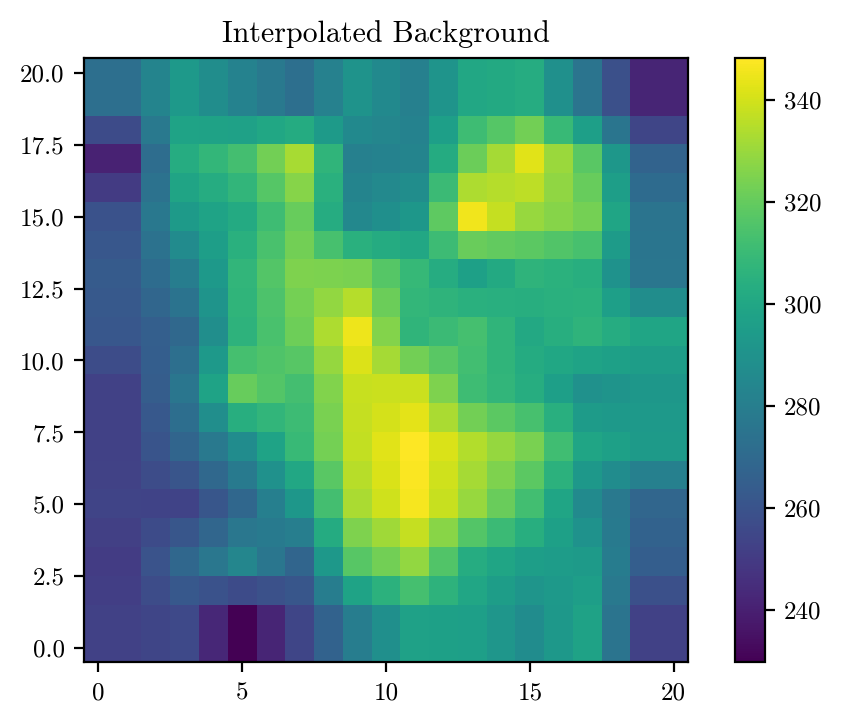

In [15]:
t_image = np.zeros(initPics36[0].shape)
# atoms
for i, loc in enumerate(ah.unpackAtomLocations([1,1,2,10,10])):
    t_image[loc[0],loc[1]] = loadThresholds[i].t
# between hor
for i, loc in enumerate(ah.unpackAtomLocations([2,1,2,10,9])):
    t_image[loc[0],loc[1]] = (t_image[loc[0]-1,loc[1]] + t_image[loc[0] + 1,loc[1]])/2
for i, loc in enumerate(ah.unpackAtomLocations([1,2,2,9,10])):
    t_image[loc[0],loc[1]] = (t_image[loc[0],loc[1]-1] + t_image[loc[0],loc[1]+1])/2
for i, l in enumerate(ah.unpackAtomLocations([2,2,2,9,9])):
    t_image[l[0],l[1]] = (t_image[l[0]-1,l[1]-1] + t_image[l[0]+1,l[1]+1]
                          +t_image[l[0]+1,l[1]-1] + t_image[l[0]-1,l[1]+1])/4

for r in range(21):
    t_image[r,0] = t_image[r,1]
    t_image[r,20] = t_image[r,19]
for c in range(21):
    t_image[0,c] = t_image[1,c]
    t_image[20,c] = t_image[19,c]
#t_image = t_image[2:23,1:22]
plt.imshow(t_image, origin='bottom')
plt.colorbar()
plt.title('Interpolated Background');


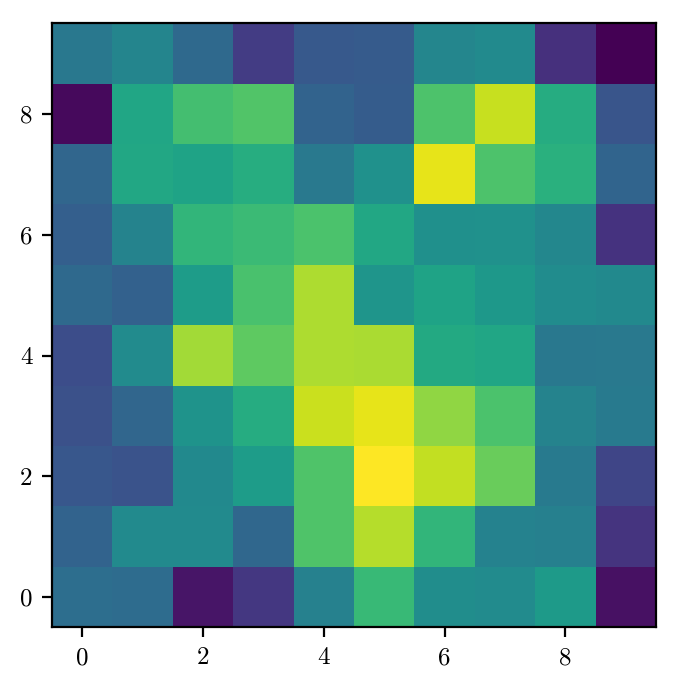

In [19]:
im = np.zeros((10,10))
for i, loc in enumerate(ah.unpackAtomLocations([0,0,1,10,10])):
    v=min([loadThresholds[i].fitVals[1], loadThresholds[i].fitVals[4]])
    im[loc[0],loc[1]] = v
plt.imshow(im, origin='bottom')

### Actual Figure

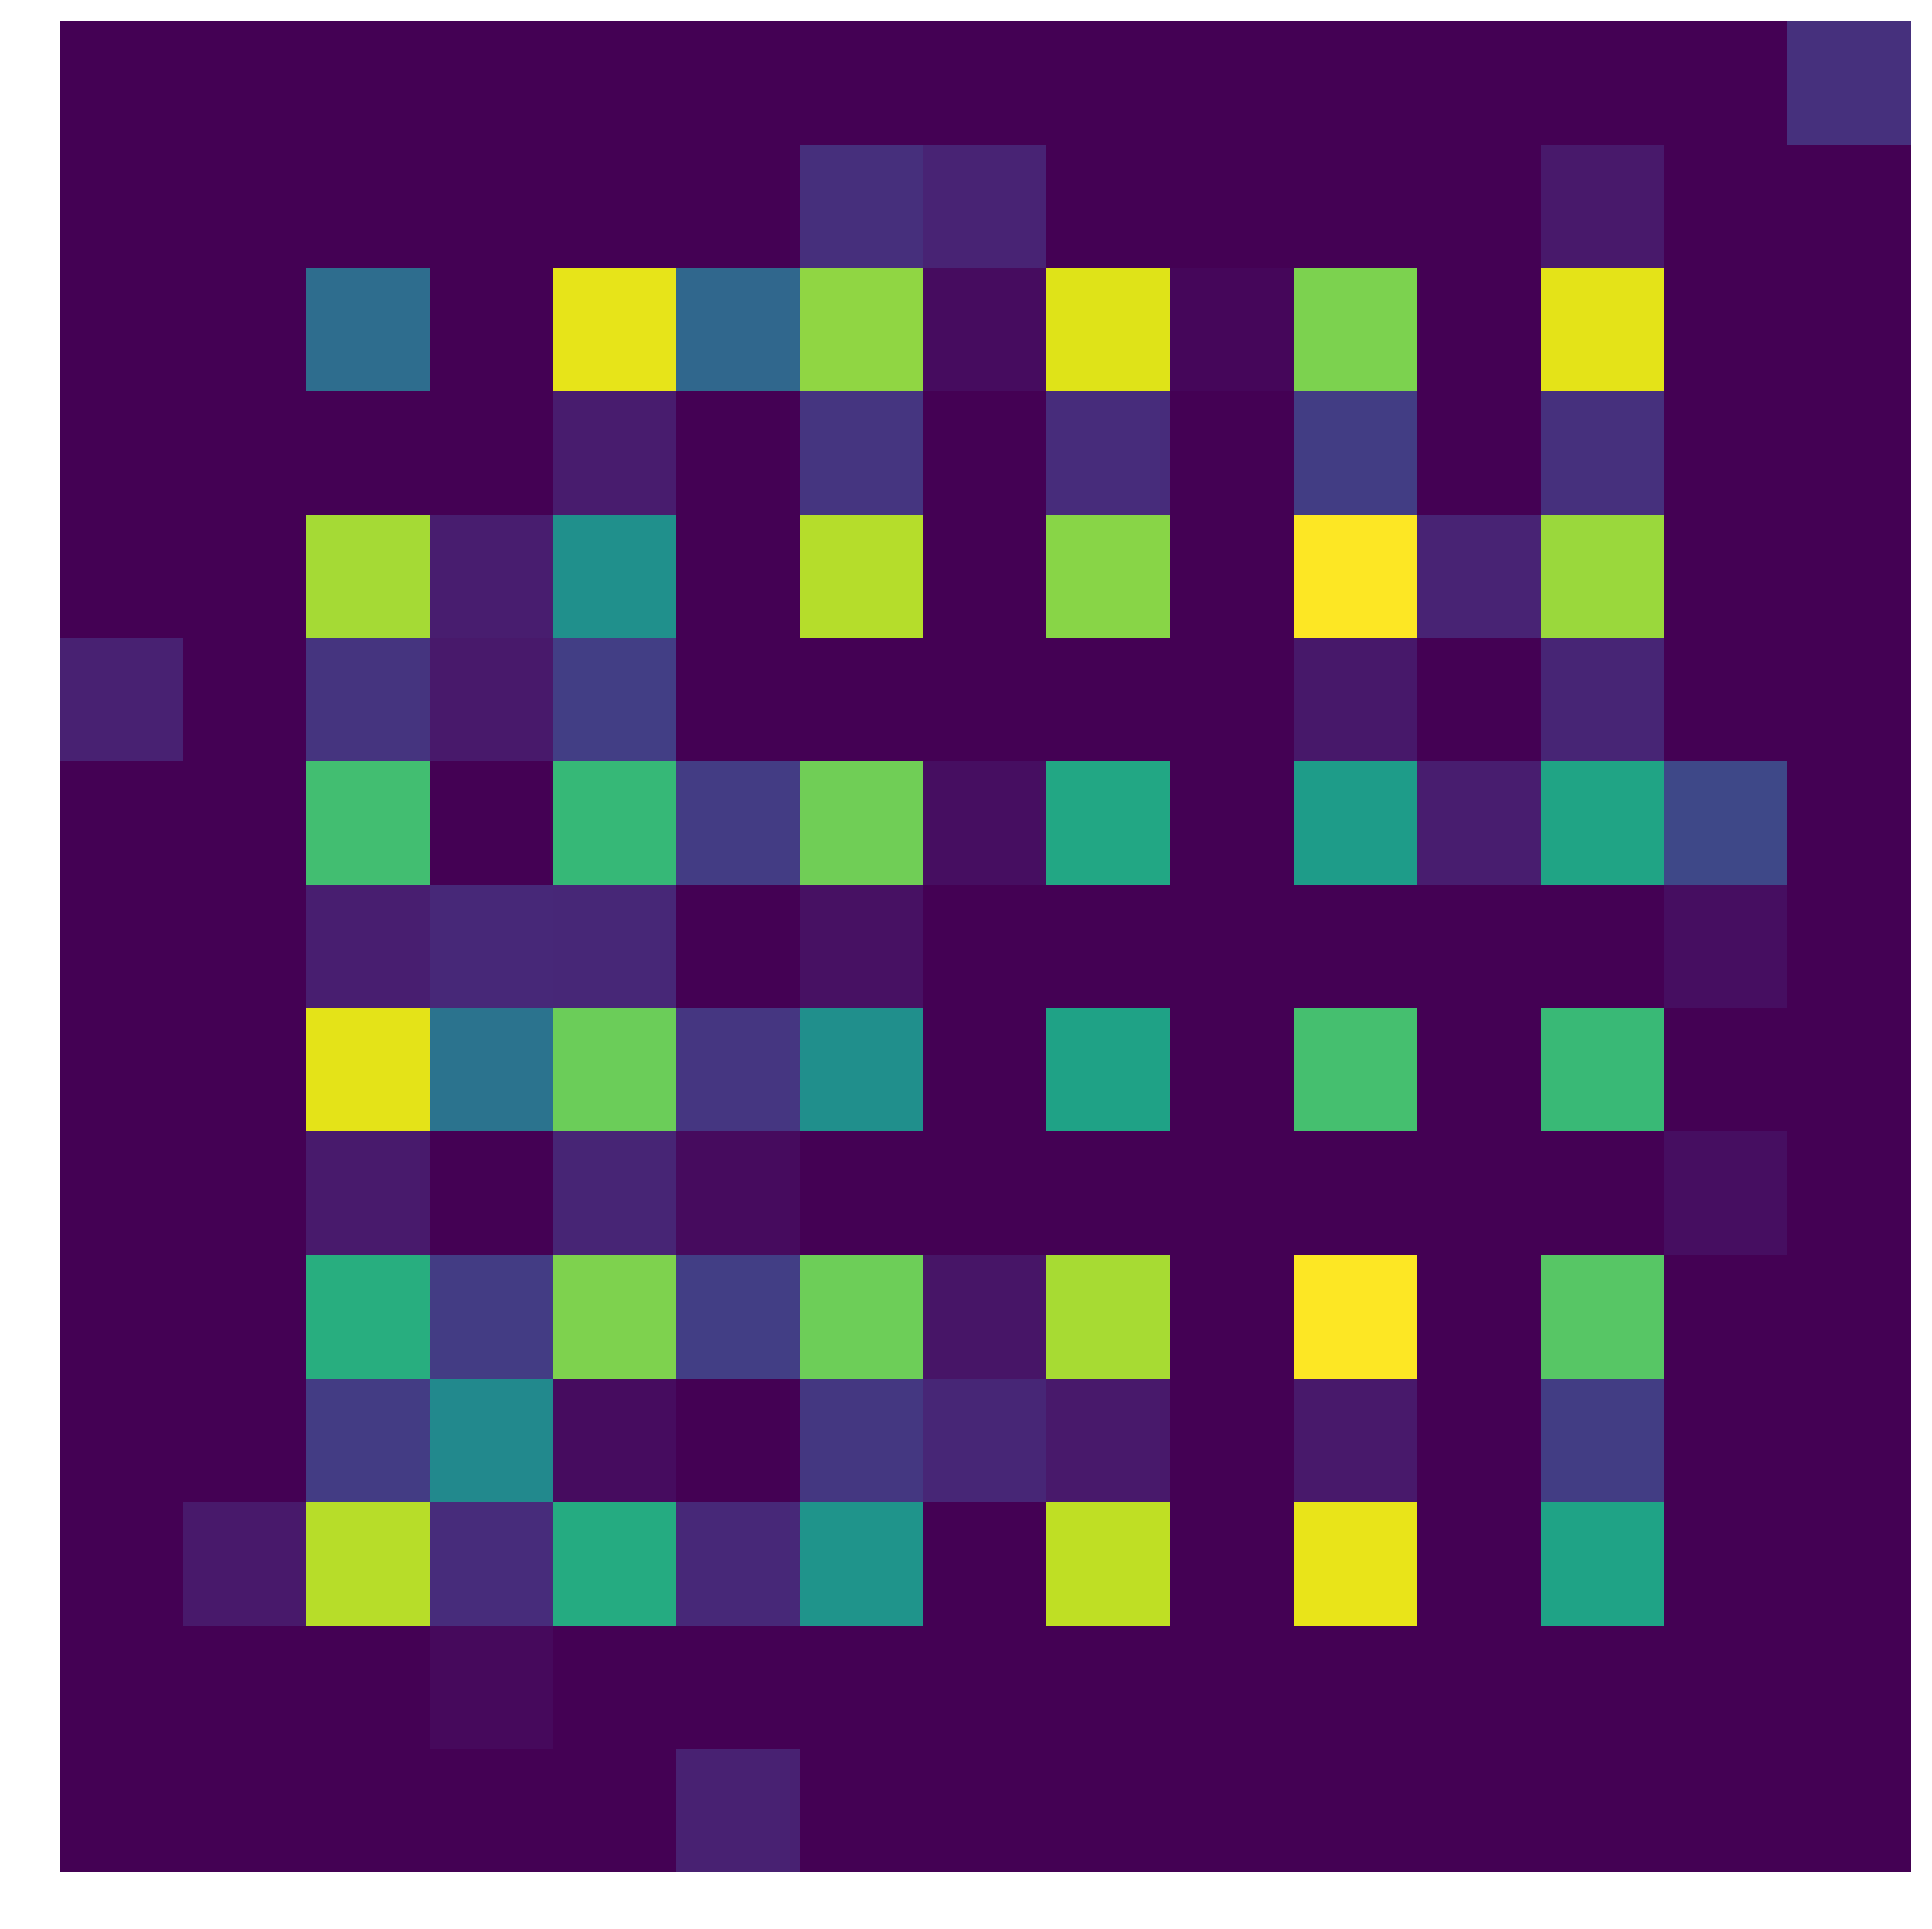

In [41]:
f = plt.figure(figsize=(10,10))
f.subplots_adjust(bottom = 0)
f.subplots_adjust(top = 1)
f.subplots_adjust(right = 1)
f.subplots_adjust(left = 0)
plt.imshow(fin_[3:-3,3:-3], vmin=-60,vmax=125, origin='bottom')
#plt.colorbar()
plt.axis('off')
plt.savefig('Final_Rearranged_Only___.png', dpi=400, bbox_to_inches='tight',pad_inches=0)

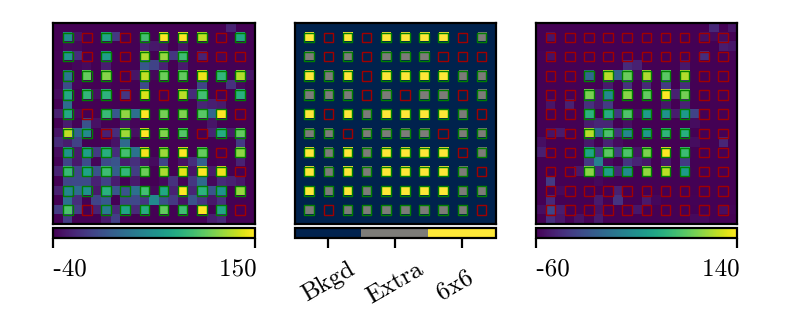

In [16]:
fs = 9
which = 3
numAtoms = sum([bool(x) for y in atomizedPics36[which] for x in y])
f, (ax_1, ax_2, ax_3) = plt.subplots(1,3)
f.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
f.set_size_inches(3.8,5.5)
#f.set_size_inches([20,4.25])
init_ = np.zeros((21,21))
thresholdInc = 0
avgThresh = 0
for thresh in loadThresholds:
    avgThresh += thresh.t
avgThresh /= 100
for loc in ah.unpackAtomLocations([0,0,1,21,21]):
    init_[loc[0],loc[1]] = initPics36[which][loc[0],loc[1]] - t_image[loc[0],loc[1]]
fin_ = np.zeros((21,21))
thresholdInc=0
for loc in ah.unpackAtomLocations([0,0,1,21,21]):
    init_[loc[0],loc[1]] = initPics36[which][loc[0],loc[1]] - t_image[loc[0],loc[1]]
for loc in ah.unpackAtomLocations([0,0,1,21,21]):
    fin_[loc[0],loc[1]] = finPics36[which][loc[0],loc[1]] - t_image[loc[0],loc[1]]

# initAtomized
pics   = [init_, atomizedPics36[which][2:23,1:22], fin_] 
mins   = [-40,0,-60]
maxs   = [150,2,140]
cmaps  = ['viridis', mpl.cm.get_cmap('cividis',3), 'viridis']
titles = ['Initial', 'Atomized-Selected', 'Final']

for i, (a, p, _min, _max, cm, t) in enumerate(zip([ax_1,ax_2,ax_3], pics, mins, maxs, cmaps, titles)):
    im = a.imshow(p, origin='bottom', cmap=cm, vmin=_min, vmax=_max)
    a.set_xticks([])
    a.set_yticks([])
    a.grid(False)
    for loc in ah.unpackAtomLocations([1,1,2,10,10]):
        if i < 2:
            color = 'g' if atomizedPics36[which][2:23,1:22][loc[0],loc[1]] else '#A00000'
            a.add_patch(plt.Rectangle((loc[1]-0.5, loc[0]-0.5),1,1, zorder=2, facecolor='none', edgecolor=color,linewidth=0.5))
        else:
            #color = '#505050'
            color = 'g' if finAtomized36[which][2:23,1:22][loc[0],loc[1]] else '#A00000'
            a.add_patch(plt.Rectangle((loc[1]-0.5, loc[0]-0.5),1,1, zorder=2, facecolor='none', edgecolor=color,linewidth=0.5))
    divider = make_axes_locatable(a)
    cax = divider.new_vertical(size="5%", pad=0.02, pack_start=True)
    f.add_axes(cax)
    cb = f.colorbar(im, cax=cax, orientation="horizontal")
    if i is 1:
        cb.set_ticks([1/3,1,5/3])
        cb.ax.set_xticklabels(['Bkgd','Extra','6x6  '],rotation=30)
    else:
        cb.set_ticks([_min,_max])
        cb.ax.set_xticklabels(['    ' + str(_min),str(_max) + '    '],rotation=0)
        cb.ax.tick_params(labelsize=fs)
#plt.savefig('rerng_seq.svg', transparent=True, dpi=400, pad_inches=0)

### middle fig verion

In [33]:
from matplotlib import colors

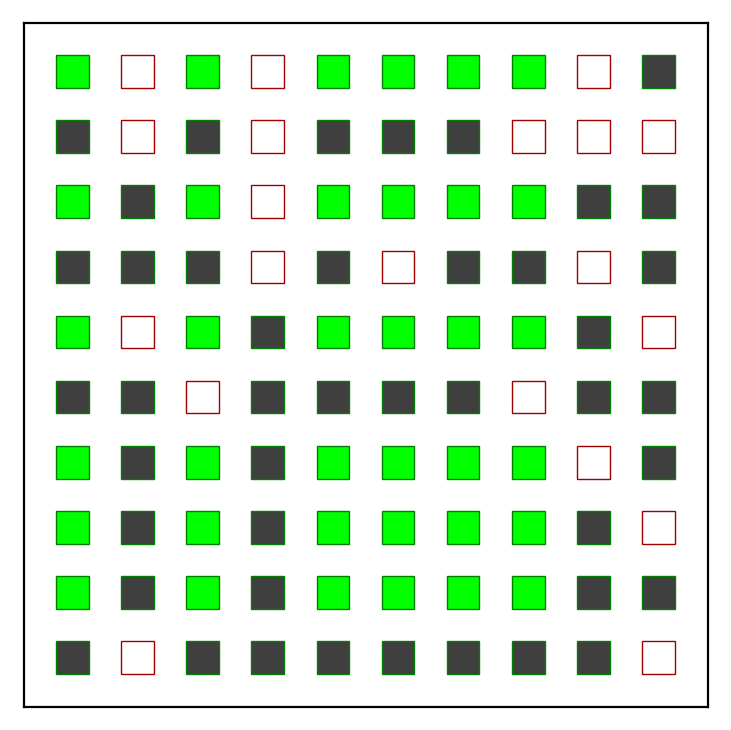

In [54]:
fs = 9
which = 3
numAtoms = sum([bool(x) for y in atomizedPics36[which] for x in y])
f = plt.figure()
#f, (ax_1, ax_2, ax_3) = plt.subplots(1,3)
f.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
f.set_size_inches(3.8,5.5)
init_ = np.zeros((21,21))
thresholdInc = 0
avgThresh = 0
for thresh in loadThresholds:
    avgThresh += thresh.t
avgThresh /= 100
for loc in ah.unpackAtomLocations([0,0,1,21,21]):
    init_[loc[0],loc[1]] = initPics36[which][loc[0],loc[1]] - t_image[loc[0],loc[1]]
fin_ = np.zeros((21,21))
thresholdInc=0
for loc in ah.unpackAtomLocations([0,0,1,21,21]):
    init_[loc[0],loc[1]] = initPics36[which][loc[0],loc[1]] - t_image[loc[0],loc[1]]
for loc in ah.unpackAtomLocations([0,0,1,21,21]):
    fin_[loc[0],loc[1]] = finPics36[which][loc[0],loc[1]] - t_image[loc[0],loc[1]]

# initAtomized
pics   = [init_, atomizedPics36[which][2:23,1:22], fin_] 
mins   = [-40,0,-60]
maxs   = [150,2,140]
cmaps  = ['viridis', mpl.cm.get_cmap('cividis',3), 'viridis']
titles = ['Initial', 'Atomized-Selected', 'Final']

#for i, (a, p, _min, _max, cm, t) in enumerate(zip([ax_1,ax_2,ax_3], pics, mins, maxs, cmaps, titles)):
c_cmap = colors.ListedColormap(['#FFFFFF', '#3F3F3F','#00FF00'])
#c_cmap = colors.ListedColormap(['#FFFFFF', '#3F3F3F','#3F3F3F'])
#boundaries = [-1, -0.9, -0.6, -0.3, 0, 0.3, 0.6, 1]
#norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

a = plt.gca()
im = a.imshow(atomizedPics36[which][2:23,1:22], origin='bottom', cmap=c_cmap, vmin=0, vmax=2)
a.set_xticks([])
a.set_yticks([])
a.grid(False)
for loc in ah.unpackAtomLocations([1,1,2,10,10]):
    color = 'g' if atomizedPics36[which][2:23,1:22][loc[0],loc[1]] else '#A00000'
    a.add_patch(plt.Rectangle((loc[1]-0.5, loc[0]-0.5),1,1, zorder=2, facecolor='none', edgecolor=color,linewidth=0.5))
plt.savefig('custom_fig3a_mid_color.svg', transparent=True, dpi=400, pad_inches=0)